In [78]:
! git clone https://github.com/hungpham13/Laptop-EDA/

fatal: destination path 'Laptop-EDA' already exists and is not an empty directory.


In [79]:
!pip install missingno

In [136]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [161]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy.stats import chi2_contingency, entropy

In [81]:
main_data = pd.read_csv('./Laptop-EDA/merged_data.csv')
main_data.head()

,Unnamed: 0,Index_cellphones,Index_fpt,Index_fpt_tgdd,Index_tgdd,Comment_count,Price,Rating,Rating_count,Series,...,screen_technology,sd_card,storage_extra_slot,storage_type,headphone_jack,thickness,type_c,usb_a,width,Availabe_in
0,0,https://cellphones.com.vn/laptop-gaming-acer-n...,0.0,0.0,https://www.thegioididong.com/laptop/acer-nitr...,906.0,2.862633e+07,0.0,0.0,nitro 5 gaming an515 57 74nu nh.qd9sv.001,...,ips,no,yes,ssd,yes,23.9,yes,yes,255.00,3
1,1,https://cellphones.com.vn/laptop-msi-modern-14...,1.0,1.0,https://www.thegioididong.com/laptop/msi-gamin...,400.0,2.125967e+07,0.0,0.0,gaming modern 14 b11sbu 669vn,...,ips,yes,no,ssd,yes,16.9,yes,yes,219.00,3
2,2,NaN,2.0,2.0,https://www.thegioididong.com/laptop/dell-insp...,322.0,1.529450e+07,3.7,18.0,inspiron 15 3511 p112f001abl,...,va,yes,yes,ssd,yes,18.9,no,yes,235.50,2
3,3,NaN,4.0,4.0,NaN,378.0,1.499900e+07,5.0,4.0,ideapad slim 3 15itl6 82h80040vn,...,led,yes,yes,ssd,yes,19.9,yes,yes,237.70,1
4,4,NaN,6.0,5.0,NaN,1244.0,1.879900e+07,5.0,5.0,ideapad slim 5 15itl05 82fg00r0vn,...,ips,yes,yes,ssd,yes,17.9,yes,yes,233.13,1


In [82]:
main_data = main_data.drop('Index_fpt', axis = 1)
main_data = main_data.drop('Index_cellphones', axis = 1)
main_data = main_data.drop('Index_tgdd', axis = 1)
main_data = main_data.drop('Index_fpt_tgdd', axis = 1)
main_data = main_data.drop('Unnamed: 0', axis = 1)
main_data.head()

,Comment_count,Price,Rating,Rating_count,Series,Brand,cpu_brand,cpu_code,ram_size,storage_size,...,screen_technology,sd_card,storage_extra_slot,storage_type,headphone_jack,thickness,type_c,usb_a,width,Availabe_in
0,906.0,2.862633e+07,0.0,0.0,nitro 5 gaming an515 57 74nu nh.qd9sv.001,acer,intel,11800h,8.0,512.0,...,ips,no,yes,ssd,yes,23.9,yes,yes,255.00,3
1,400.0,2.125967e+07,0.0,0.0,gaming modern 14 b11sbu 669vn,msi,intel,1155g7,8.0,512.0,...,ips,yes,no,ssd,yes,16.9,yes,yes,219.00,3
2,322.0,1.529450e+07,3.7,18.0,inspiron 15 3511 p112f001abl,dell,intel,1115g4,4.0,256.0,...,va,yes,yes,ssd,yes,18.9,no,yes,235.50,2
3,378.0,1.499900e+07,5.0,4.0,ideapad slim 3 15itl6 82h80040vn,lenovo,intel,1115g4,8.0,512.0,...,led,yes,yes,ssd,yes,19.9,yes,yes,237.70,1
4,1244.0,1.879900e+07,5.0,5.0,ideapad slim 5 15itl05 82fg00r0vn,lenovo,intel,1135g7,16.0,512.0,...,ips,yes,yes,ssd,yes,17.9,yes,yes,233.13,1


In [83]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       552 non-null    float64
 1   Price               496 non-null    float64
 2   Rating              552 non-null    float64
 3   Rating_count        552 non-null    float64
 4   Series              552 non-null    object 
 5   Brand               552 non-null    object 
 6   cpu_brand           552 non-null    object 
 7   cpu_code            552 non-null    object 
 8   ram_size            552 non-null    float64
 9   storage_size        552 non-null    float64
 10  displ_size          552 non-null    float64
 11  displ_rate          552 non-null    float64
 12  Battery             489 non-null    float64
 13  GPU                 549 non-null    object 
 14  OS                  548 non-null    object 
 15  P/N                 507 non-null    object 
 16  displ_re

In [84]:
numeric_attributes = main_data.select_dtypes(include=[np.number])
print(numeric_attributes.columns)
print('Number of numeric attributes: {}'.format(len(numeric_attributes.columns)))

Index(['Comment_count', 'Price', 'Rating', 'Rating_count', 'ram_size',
       'storage_size', 'displ_size', 'displ_rate', 'Battery', 'Release_year',
       'Weight', 'length', 'width', 'Availabe_in'],
      dtype='object')
Number of numeric attributes: 14


In [85]:
categorical_attributes = main_data.select_dtypes(include=[np.object])
print(categorical_attributes.columns)
print('Number of categorical attributes: {}'.format(len(categorical_attributes.columns)))

Index(['Series', 'Brand', 'cpu_brand', 'cpu_code', 'GPU', 'OS', 'P/N',
       'displ_resolution', 'hdmi', 'Surface', 'backlit_keyboard', 'lan',
       'ram_upgradable', 'screen_technology', 'sd_card', 'storage_extra_slot',
       'storage_type', 'headphone_jack', 'thickness', 'type_c', 'usb_a'],
      dtype='object')
Number of categorical attributes: 21


In [86]:
for att in categorical_attributes:
    try:
        main_data[att] = pd.to_numeric(main_data[att])  
    except:
        pass
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       552 non-null    float64
 1   Price               496 non-null    float64
 2   Rating              552 non-null    float64
 3   Rating_count        552 non-null    float64
 4   Series              552 non-null    object 
 5   Brand               552 non-null    object 
 6   cpu_brand           552 non-null    object 
 7   cpu_code            552 non-null    object 
 8   ram_size            552 non-null    float64
 9   storage_size        552 non-null    float64
 10  displ_size          552 non-null    float64
 11  displ_rate          552 non-null    float64
 12  Battery             489 non-null    float64
 13  GPU                 549 non-null    object 
 14  OS                  548 non-null    object 
 15  P/N                 507 non-null    object 
 16  displ_re

<BarContainer object of 2 artists>

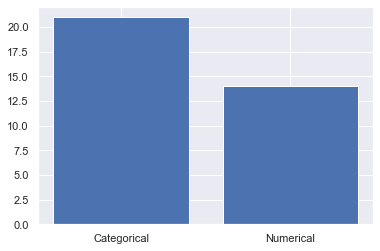

In [87]:
y = [len(categorical_attributes.columns), len(numeric_attributes.columns)]
x =['Categorical', 'Numerical']
plt.bar(x, y, label = 'Numerical and Categorical Att Count')

In [88]:
for att in numeric_attributes.columns:
    main_data[att].fillna(main_data[att].mean(), inplace = True)
for att in categorical_attributes.columns:
    main_data[att].fillna('NaN', inplace = True)
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Comment_count       552 non-null    float64
 1   Price               552 non-null    float64
 2   Rating              552 non-null    float64
 3   Rating_count        552 non-null    float64
 4   Series              552 non-null    object 
 5   Brand               552 non-null    object 
 6   cpu_brand           552 non-null    object 
 7   cpu_code            552 non-null    object 
 8   ram_size            552 non-null    float64
 9   storage_size        552 non-null    float64
 10  displ_size          552 non-null    float64
 11  displ_rate          552 non-null    float64
 12  Battery             552 non-null    float64
 13  GPU                 552 non-null    object 
 14  OS                  552 non-null    object 
 15  P/N                 552 non-null    object 
 16  displ_re

In [89]:
def plot_statistics(df: pd.DataFrame, bins = 10, title = None):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex= True, gridspec_kw={"height_ratios": (.15, .85)})
    fig.set_figheight(5)
    fig.set_figwidth(10)
    ax_box.set_title(title)
    sns.boxplot(df, ax=ax_box)
    sns.distplot(df, ax=ax_hist, bins = bins)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [90]:
primary_attributes = main_data[['Comment_count', 'Rating', 'Rating_count']]
price = main_data.Price
for col in primary_attributes.columns:
    print(primary_attributes[col].unique())

[9.060e+02 4.000e+02 3.220e+02 3.780e+02 1.244e+03 5.580e+02 1.770e+02
 3.200e+01 6.500e+01 2.680e+02 1.650e+02 4.210e+02 5.700e+01 2.700e+01
 8.000e+00 5.400e+01 2.230e+02 6.000e+00 1.500e+01 3.800e+01 0.000e+00
 4.000e+00 1.000e+00 3.000e+01 1.900e+01 1.000e+01 4.400e+01 6.000e+01
 1.200e+01 5.600e+01 9.900e+01 3.170e+02 3.290e+02 1.040e+02 5.300e+01
 2.400e+01 1.700e+01 3.300e+01 4.310e+02 2.000e+00 2.300e+01 3.100e+01
 2.120e+02 2.090e+02 9.690e+02 1.500e+02 4.800e+01 7.940e+02 3.710e+02
 9.200e+01 3.600e+01 5.800e+01 5.000e+01 2.180e+02 8.400e+01 3.540e+02
 3.770e+02 3.560e+02 2.940e+02 3.179e+03 6.770e+02 5.000e+00 4.100e+01
 2.000e+01 6.900e+01 4.500e+01 9.000e+01 1.100e+01 1.370e+02 1.400e+02
 1.180e+02 7.300e+01 9.600e+01 1.070e+02 3.000e+00 8.100e+01 4.100e+02
 1.700e+02 2.080e+02 3.700e+01 1.630e+02 3.400e+01 1.120e+02 1.220e+02
 4.000e+01 2.500e+01 1.870e+02 3.570e+02 9.740e+02 1.240e+02 9.000e+00
 1.310e+02 3.930e+02 1.476e+03 5.610e+02 8.140e+02 3.460e+02 1.720e+02
 3.430

count    5.520000e+02
mean     2.675048e+07
std      1.226619e+07
min      7.290000e+06
25%      1.876950e+07
50%      2.499000e+07
75%      3.007288e+07
max      9.299000e+07
Name: Price, dtype: float64


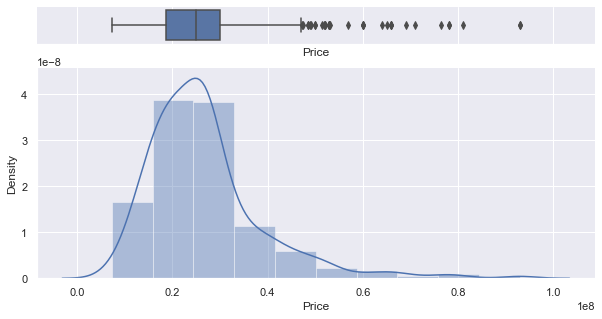

In [91]:
print(price.describe())
plot_statistics(price)

In [92]:
low_price = main_data[main_data['Price'] < main_data['Price'].quantile(0.33)]
avr_price = main_data[(main_data['Price'] > main_data['Price'].quantile(0.33)) & 
                          (main_data['Price'] < main_data['Price'].quantile(0.67))]
high_price = main_data[main_data['Price'] > main_data['Price'].quantile(0.67)]
print('low_price:  {} \navr_price:  {} \nhigh_price: {}'.format(len(low_price), len(avr_price), len(high_price)))

low_price:  180 
avr_price:  184 
high_price: 180


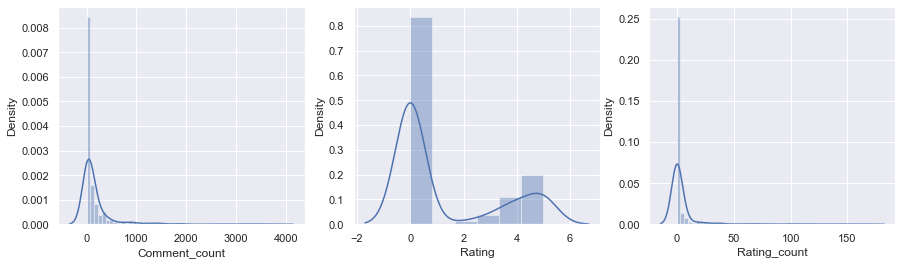

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
for i, att in enumerate(primary_attributes.columns):
    sns.distplot(primary_attributes[att], ax = ax[i])

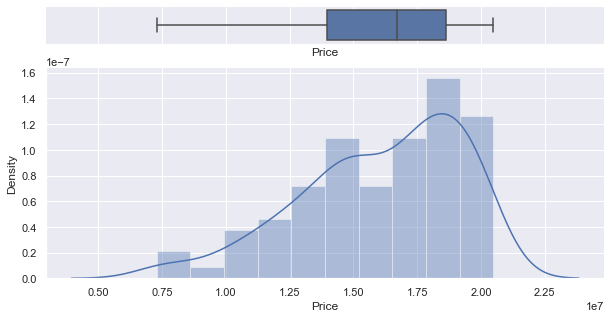

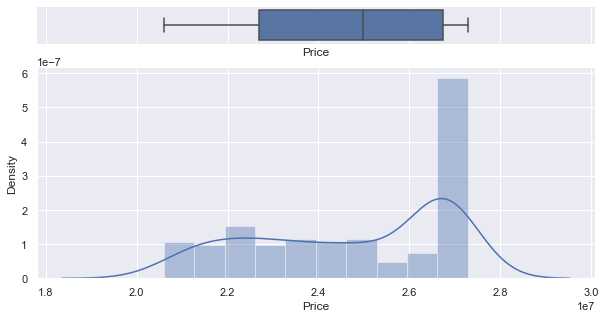

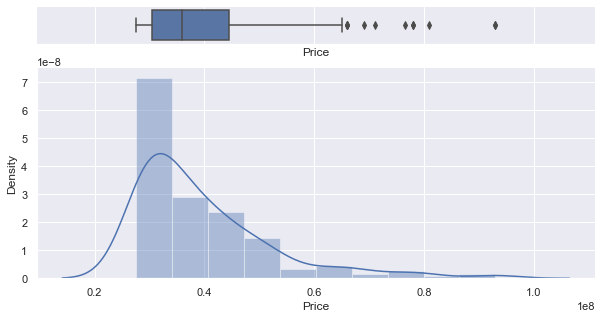

In [94]:
plot_statistics(low_price['Price'])
plot_statistics(avr_price['Price'])
plot_statistics(high_price['Price'])

In [95]:
comment_count = main_data.Comment_count 
comment_count.describe()

count     552.000000
mean      173.045290
std       404.568525
min         0.000000
25%        12.000000
50%        42.000000
75%       140.000000
max      3813.000000
Name: Comment_count, dtype: float64

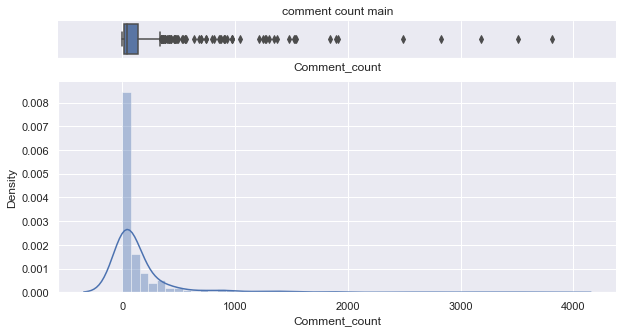

In [96]:
plot_statistics(main_data.Comment_count, bins = 50, title = 'comment count main')

In [97]:
main_data.Rating.describe()

count    552.000000
mean       1.285626
std        2.004994
min        0.000000
25%        0.000000
50%        0.000000
75%        3.505000
max        5.000000
Name: Rating, dtype: float64

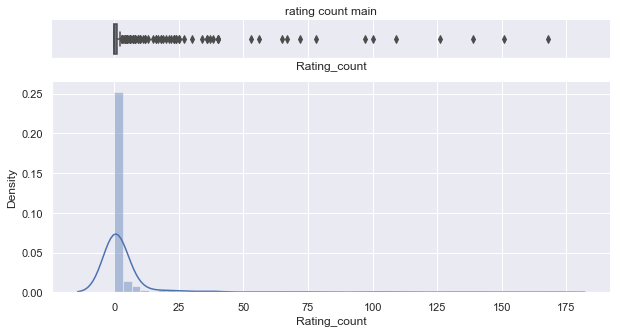

In [98]:
plot_statistics(main_data.Rating_count, bins = 50, title = 'rating count main')

<BarContainer object of 3 artists>

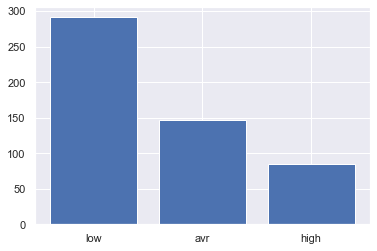

In [99]:
x = ['low', 'avr', 'high']
y = [low_price['Comment_count'].mean(), avr_price['Comment_count'].mean(), high_price['Comment_count'].mean()]
plt.bar(x,y)

<BarContainer object of 3 artists>

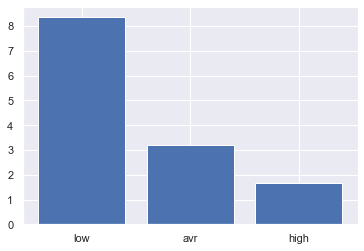

In [100]:
plt.bar(['low', 'avr', 'high'],
        [low_price['Rating_count'].mean(), avr_price['Rating_count'].mean(), high_price['Rating_count'].mean()])

In [101]:
rating = main_data.Rating
rating.describe()

count    552.000000
mean       1.285626
std        2.004994
min        0.000000
25%        0.000000
50%        0.000000
75%        3.505000
max        5.000000
Name: Rating, dtype: float64

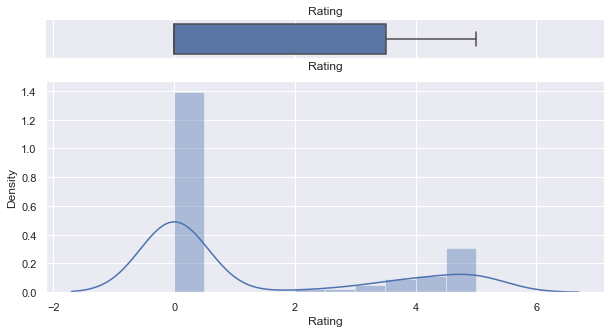

In [102]:
plot_statistics(rating, title = 'Rating')

In [103]:
rating_count = main_data.Rating_count
rating_count.describe()

count    552.000000
mean       4.389493
std       16.812150
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      168.000000
Name: Rating_count, dtype: float64

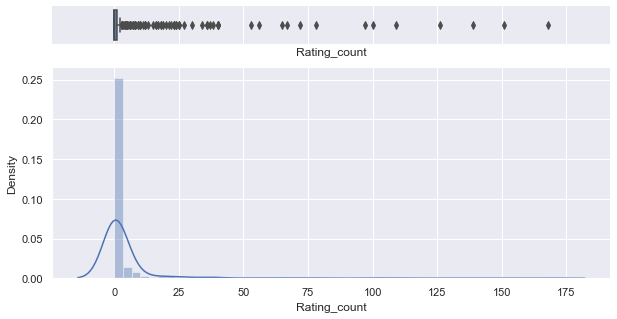

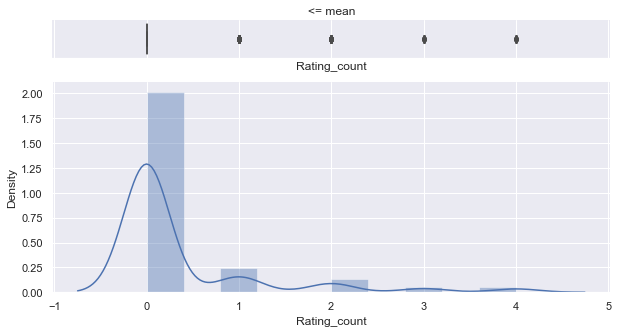

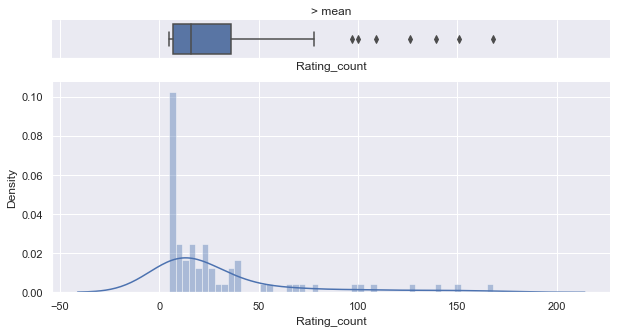

In [104]:
plot_statistics(rating_count, bins = 50)
plot_statistics(rating_count[rating_count <= rating_count.mean()], bins = 10, title = '<= mean')
plot_statistics(rating_count[rating_count > rating_count.mean()], bins = 50, title = '> mean')

Comment_count    5.056249
Price            1.858115
Rating           1.009320
Rating_count     6.280445
ram_size         1.842154
storage_size     2.383553
displ_size       3.270010
displ_rate       2.255884
Battery          3.678874
Release_year    -3.353786
Weight           4.559104
length           3.268369
width            1.891313
Availabe_in      1.551769
dtype: float64

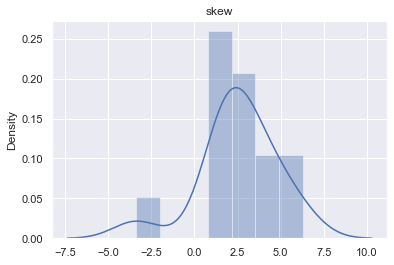

In [105]:
ax = sns.distplot(main_data.skew())
ax.set_title('skew')
main_data.skew()

<AxesSubplot:>

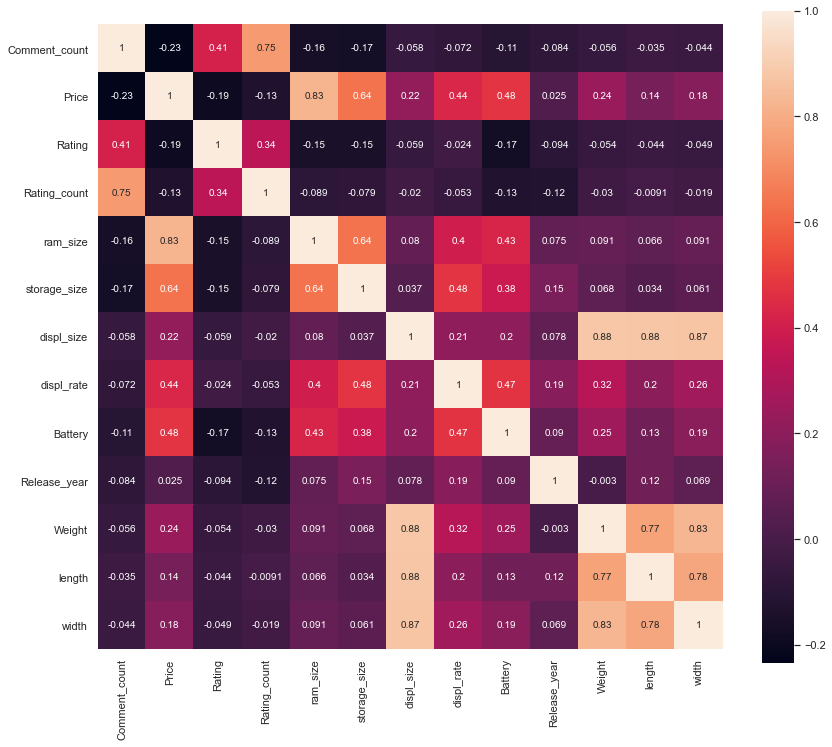

In [106]:
numeric_attributes['Comment_count'] = numeric_attributes['Comment_count']/numeric_attributes['Availabe_in']
numeric_attributes['Rating_count'] = numeric_attributes['Rating_count']/numeric_attributes['Availabe_in']
normalized_numeric_attributes = (numeric_attributes - numeric_attributes.mean())/numeric_attributes.std()
correlation = normalized_numeric_attributes.drop('Availabe_in', axis = 1).corr()
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, square = True, annot = True)

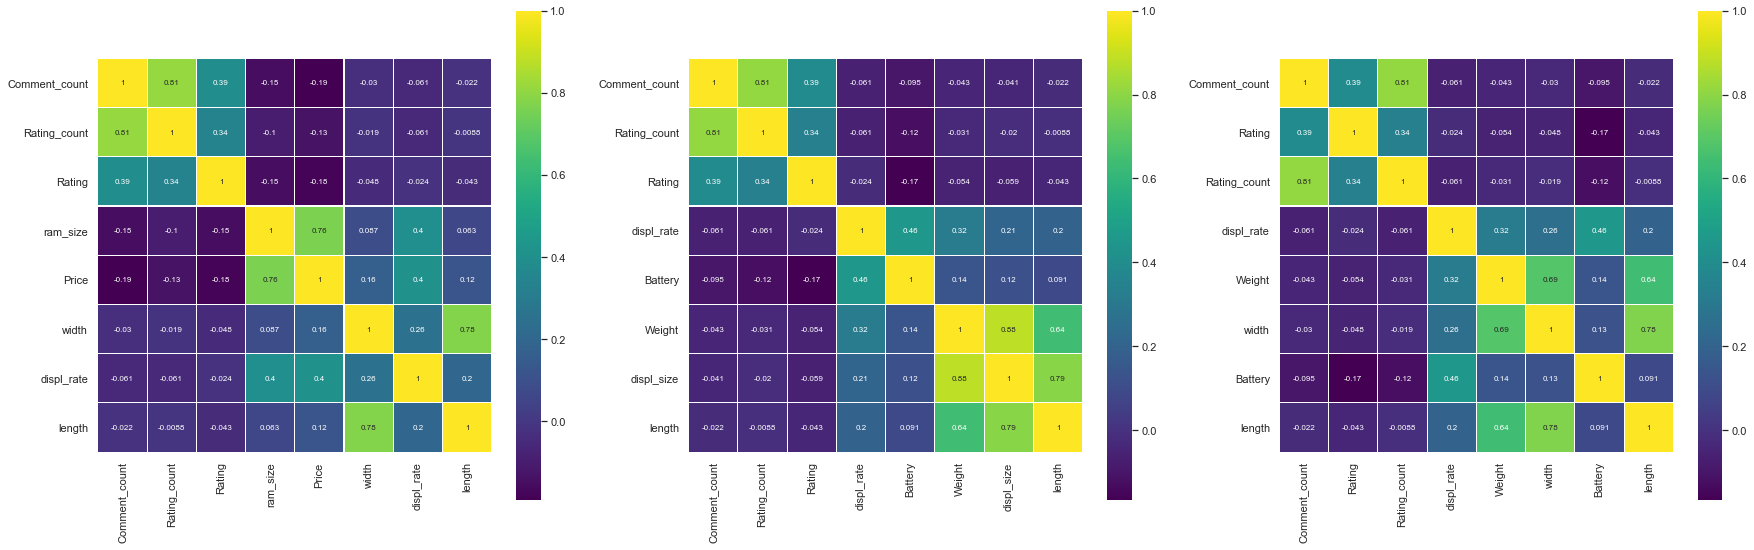

In [107]:
fig, ax = plt.subplots(figsize = (30,9), nrows = 1, ncols = 3)
k = 8
count = 0
list_attributes = [low_price, avr_price, high_price]
for j in range(len(list_attributes)):
    att = list_attributes[j]
    att['Comment_count'] = att['Comment_count']/att['Availabe_in']
    att['Rating_count'] = att['Rating_count']/att['Availabe_in']
    normalized_att = (att - att.mean())/att.std()
    correlation = normalized_att.drop('Availabe_in', axis = 1).corr()
    cols = correlation.nlargest(k, 'Comment_count').index
    zoomed_corr = np.corrcoef(main_data[cols].values.T)
    sns.heatmap(zoomed_corr,square=True,cmap='viridis', linewidths=0.01,linecolor="white",annot=True,
        xticklabels = cols.values ,yticklabels = cols.values, ax = ax[j], annot_kws = {'size':8})

Index(['Comment_count', 'Rating', 'Rating_count', 'displ_rate', 'Weight',
       'width', 'Battery', 'length'],
      dtype='object')


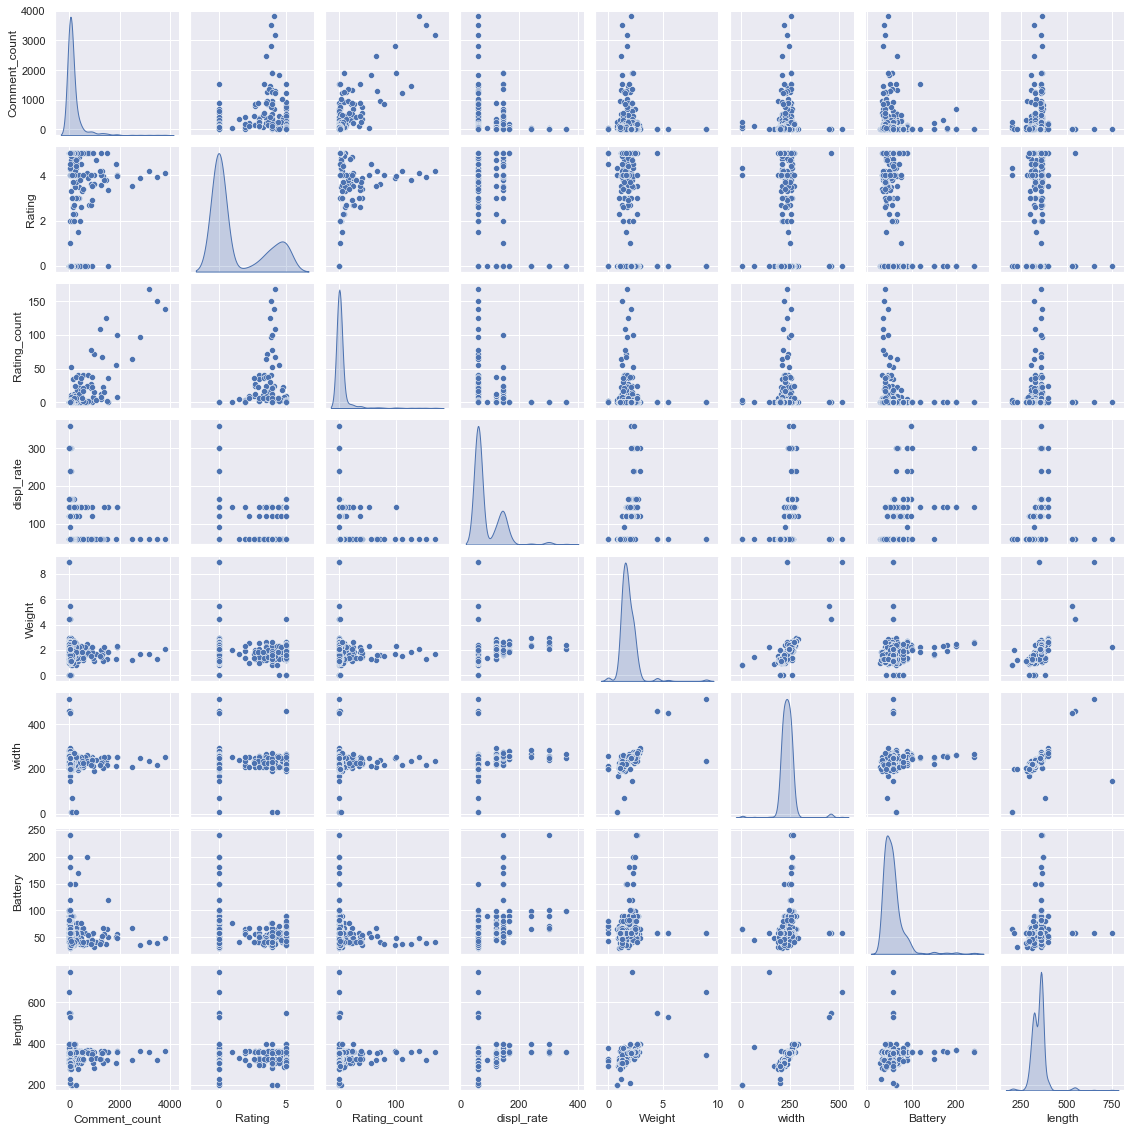

In [108]:
sns.set()
cols = correlation.nlargest(k, 'Comment_count').index
print(cols)
sns.pairplot(main_data[cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

     Rating  Rating
0       0.0     0.0
1       0.0     0.0
2       3.7     4.0
3       5.0     5.0
4       5.0     5.0
..      ...     ...
547     0.0     0.0
548     0.0     0.0
549     0.0     0.0
550     5.0     5.0
551     5.0     5.0

[552 rows x 2 columns]
     Comment_count  Rating
0            906.0     0.0
1            400.0     0.0
2            322.0     4.0
3            378.0     5.0
4           1244.0     5.0
..             ...     ...
547           39.0     0.0
548           21.0     0.0
549           76.0     0.0
550           49.0     5.0
551           29.0     5.0

[552 rows x 2 columns]
     Rating_count  Rating
0             0.0     0.0
1             0.0     0.0
2            18.0     4.0
3             4.0     5.0
4             5.0     5.0
..            ...     ...
547           0.0     0.0
548           0.0     0.0
549           0.0     0.0
550           2.0     5.0
551           1.0     5.0

[552 rows x 2 columns]
     Rating  Comment_count
0       0.0          900.

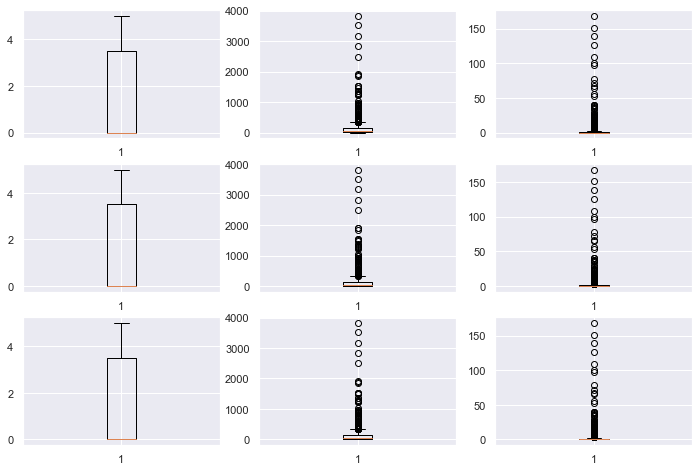

In [156]:
att_list = ['Rating', 'Comment_count', 'Rating_count']
fig, axis = plt.subplots(len(att_list), len(att_list),figsize=(12, 8))
for i in range(len(att_list)):
    for j in range(len(att_list)):
        var1 = att_list[i]
        var2 = att_list[j]
        if var1 == 'Rating':
            var1_data = main_data[var1].round()
        else: 
            var1_data = main_data[var1].round(-2)
        data = pd.concat([main_data[var2], var1_data], axis=1)
        print(data)
        axis[i,j].boxplot(x = main_data[var2], data = var1_data)

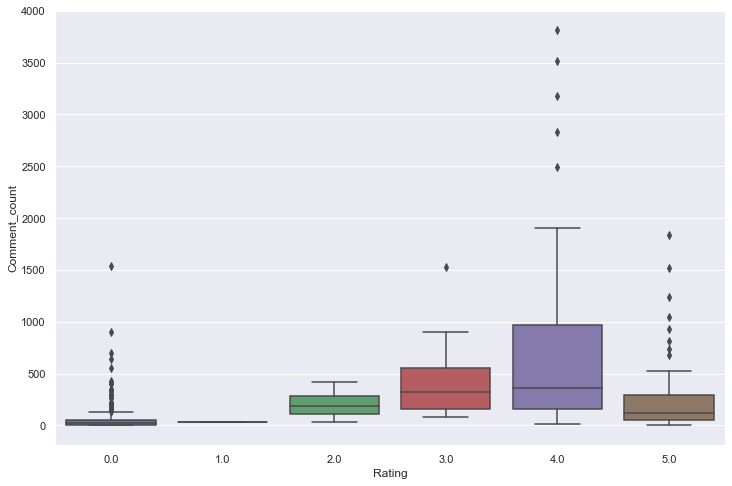

In [110]:
var = 'Rating'
var_data = main_data[var].round()
data = pd.concat([main_data['Comment_count'], var_data], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Comment_count", data=data)

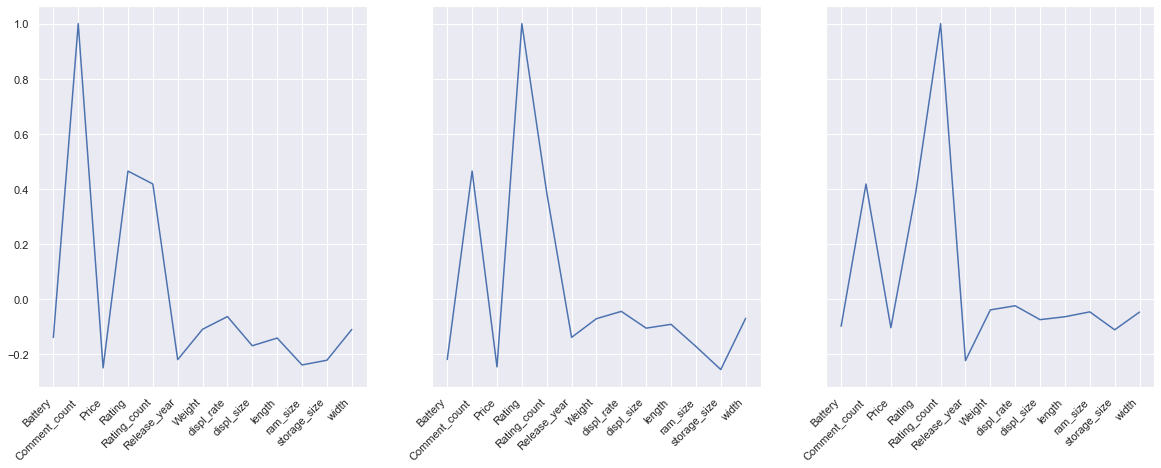

In [111]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7), sharey = True)
plt.xticks(rotation=90)
for i, att in enumerate(primary_attributes):
    ax[i].plot(correlation[att])
    ax[i].set_xticklabels(labels = correlation.columns,rotation=45, ha='right')

In [112]:
categorical_attributes.columns

Index(['Series', 'Brand', 'cpu_brand', 'cpu_code', 'GPU', 'OS', 'P/N',
       'displ_resolution', 'hdmi', 'Surface', 'backlit_keyboard', 'lan',
       'ram_upgradable', 'screen_technology', 'sd_card', 'storage_extra_slot',
       'storage_type', 'headphone_jack', 'thickness', 'type_c', 'usb_a'],
      dtype='object')

In [113]:
categorical_attributes.nunique()

Series                520
Brand                  13
cpu_brand               3
cpu_code               67
GPU                   110
OS                      4
P/N                   492
displ_resolution       23
hdmi                    2
Surface                 9
backlit_keyboard        2
lan                     2
ram_upgradable          2
screen_technology       6
sd_card                 2
storage_extra_slot      2
storage_type            3
headphone_jack          2
thickness             105
type_c                  2
usb_a                   2
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

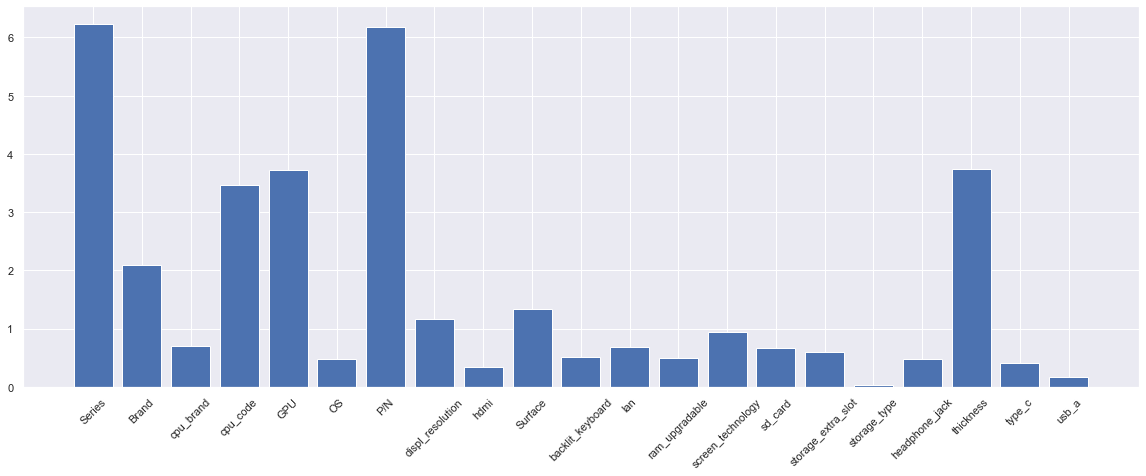

In [172]:
brand = categorical_attributes['Brand']
cpu = categorical_attributes['cpu_brand']
gpu = categorical_attributes['GPU']
os = categorical_attributes['OS']
screen_tech = categorical_attributes['screen_technology']
storage_type = categorical_attributes['storage_type']
binary_attributes = ['hdmi', 'backlit_keyboard', 'lan', 'ram_upgradable', 'sd_card', 
                     'storage_extra_slot', 'headphone_jack', 'type_c', 'usb_a']

entro = []
for att in categorical_attributes:
    entro.append(entropy(categorical_attributes[att].value_counts()))
plot = plt.figure(figsize = (20,7))
plt.bar(categorical_attributes.columns, entro)
plt.xticks(rotation = 45)

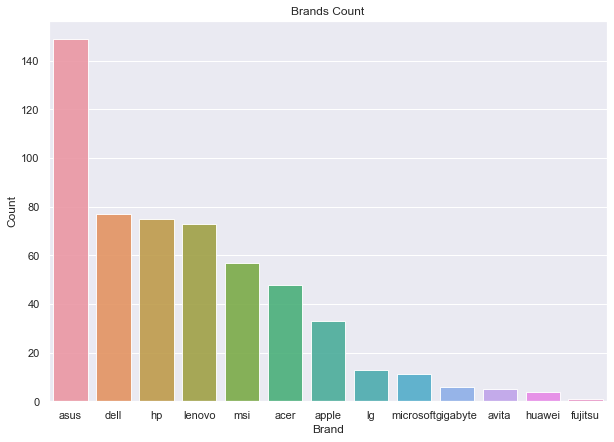

In [115]:
brand_count = brand.value_counts()
plot = plt.figure(figsize = (10, 7))
sns.barplot(brand_count.index, brand_count.values, alpha=0.9)
plt.title('Brands Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.show()

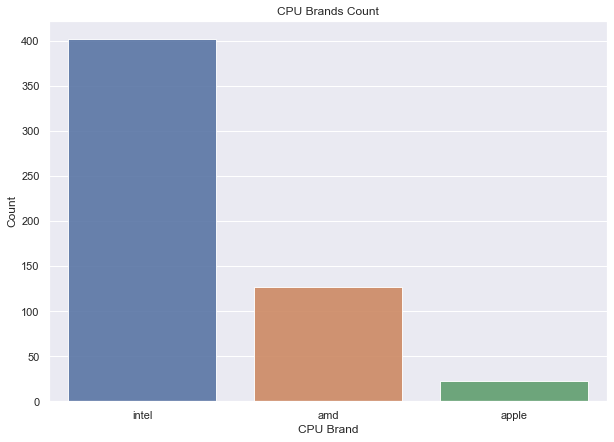

In [116]:
cpu_brand_count = cpu.value_counts()
plot = plt.figure(figsize = (10, 7))
sns.barplot(cpu_brand_count.index, cpu_brand_count.values, alpha=0.9)
plt.title('CPU Brands Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('CPU Brand', fontsize=12)
plt.show()

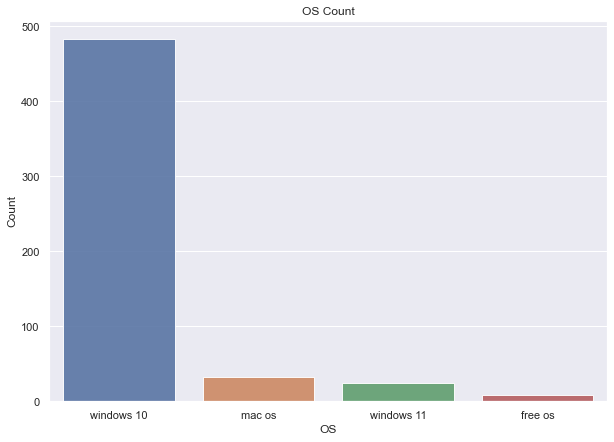

In [117]:
os_count = os.value_counts()
plot = plt.figure(figsize = (10, 7))
sns.barplot(os_count.index, os_count.values, alpha=0.9)
plt.title('OS Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('OS', fontsize=12)
plt.show()

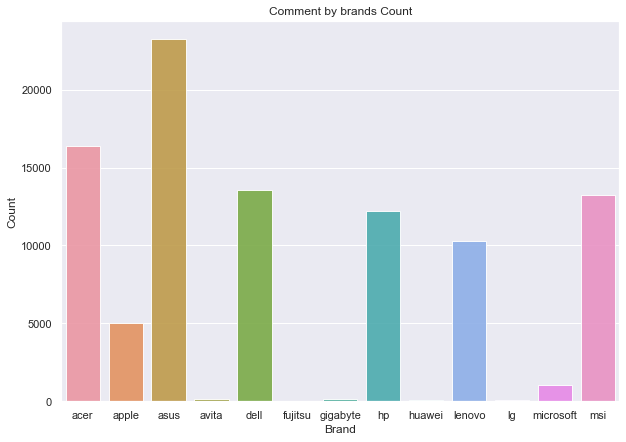

In [118]:
plot = plt.figure(figsize = (10, 7))
sns.barplot(main_data['Comment_count'].groupby(brand).sum().index, 
            main_data['Comment_count'].groupby(brand).sum(), alpha=0.9)
plt.title('Comment by brands Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.show()

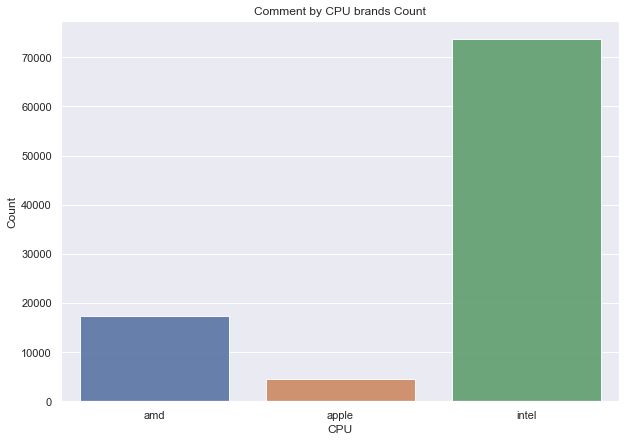

In [119]:
plot = plt.figure(figsize = (10, 7))
sns.barplot(main_data['Comment_count'].groupby(cpu).sum().index, 
            main_data['Comment_count'].groupby(cpu).sum(), alpha=0.9)
plt.title('Comment by CPU brands Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('CPU', fontsize=12)
plt.show()

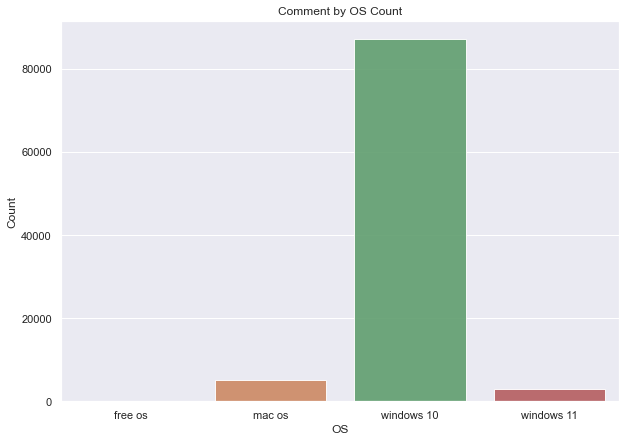

In [160]:
plot = plt.figure(figsize = (10, 7))
sns.barplot(main_data['Comment_count'].groupby(os).sum().index, 
            main_data['Comment_count'].groupby(os).sum(), alpha=0.9)
plt.title('Comment by OS Count')
plt.ylabel('Count', fontsize=12)
plt.xlabel('OS', fontsize=12)
plt.show()

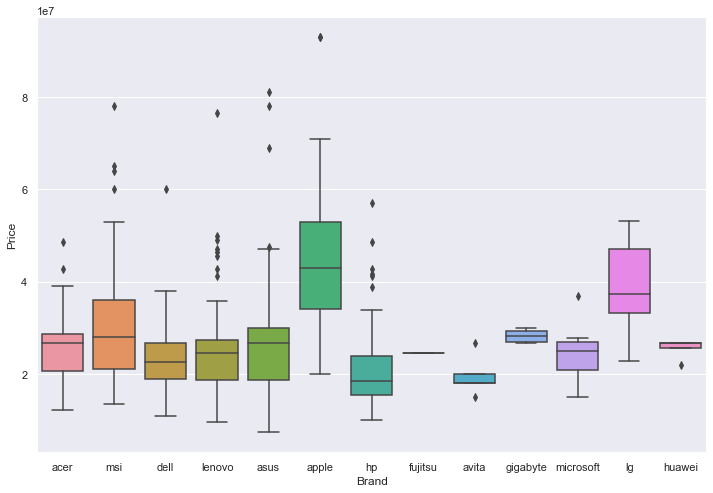

In [121]:
var_data = brand
data = pd.concat([main_data['Price'], var_data], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x= 'Brand', y="Price", data=data)

   Rating_count   Brand
0           0.0    acer
1           0.0     msi
2          18.0    dell
3           4.0  lenovo
4           5.0  lenovo


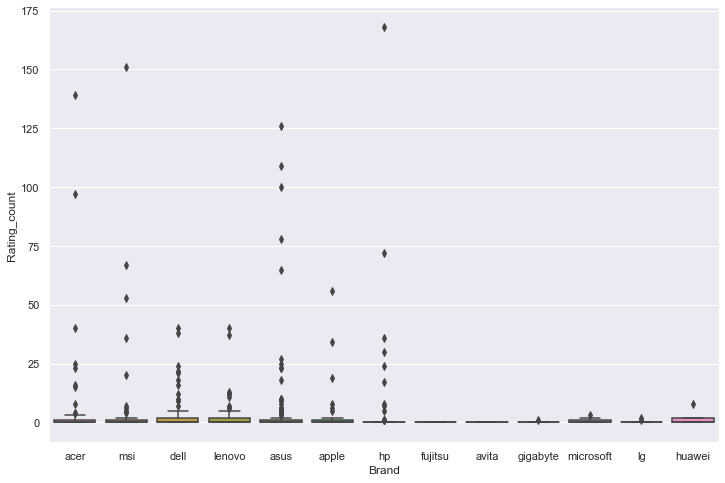

In [135]:
var_data = brand
data = pd.concat([main_data['Rating_count'], var_data], axis=1)
print(data.head())
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x= 'Brand', y="Rating_count", data=data)

<BarContainer object of 9 artists>

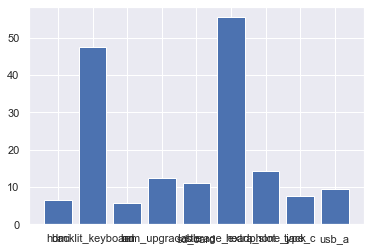

In [188]:
chi2_list = []
p_list = []
for att in binary_attributes:
    obs = pd.crosstab(index=main_data['Rating'].round(), columns = main_data[att])
    chi2, p, dof, ex = chi2_contingency(obs, correction=False)
    chi2_list.append(chi2)
    p_list.append(p)
plt.bar(binary_attributes, chi2_list)

<BarContainer object of 9 artists>

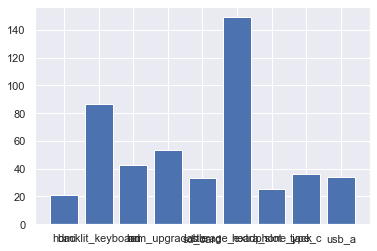

In [189]:
chi2_list = []
p_list = []
for att in binary_attributes:
    obs = pd.crosstab(index=main_data['Comment_count'].round(-2), columns = main_data[att])
    chi2, p, dof, ex = chi2_contingency(obs, correction=False)
    chi2_list.append(chi2)
    p_list.append(p)
plt.bar(binary_attributes, chi2_list)

<BarContainer object of 9 artists>

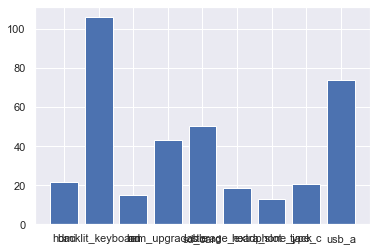

In [193]:
chi2_list = []
p_list = []
for att in binary_attributes:
    obs = pd.crosstab(index=main_data['Price'].round(-7), columns = main_data[att])
    chi2, p, dof, ex = chi2_contingency(obs, correction=False)
    chi2_list.append(chi2)
    p_list.append(p)
plt.bar(binary_attributes, chi2_list)